In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr

In [8]:
xr_df = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc')
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, nv: 2, time: 1705)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2022-01-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2022-02-11 18:54:36 by SBBX_to_nc 2.0 - ILAND=1200,...

C:\Users\Nivashini\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


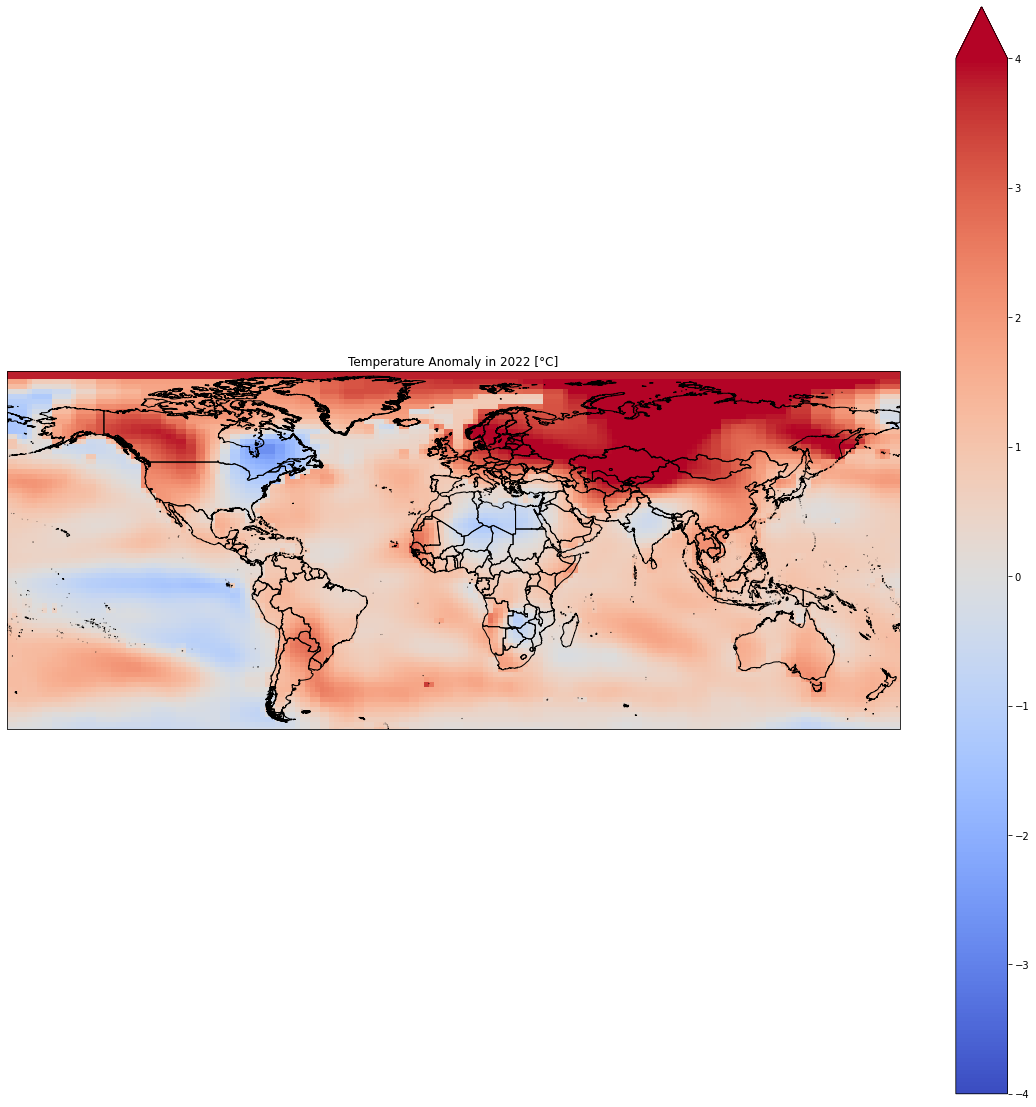

In [10]:
#Downsample the time series to yearly frequency.
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

#Creating a static image of the global temperature anomaly for a given year.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm')

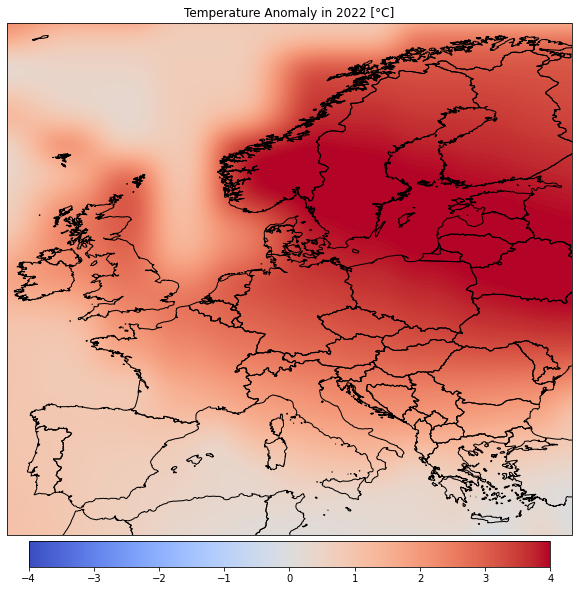

In [11]:
#Creating a static image of the european temperature anomaly for a given year.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
xr.plot.imshow(anomaly.isel(time=i), ax=ax, add_labels=False,
                   vmin=-4, vmax=4, cmap='coolwarm', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

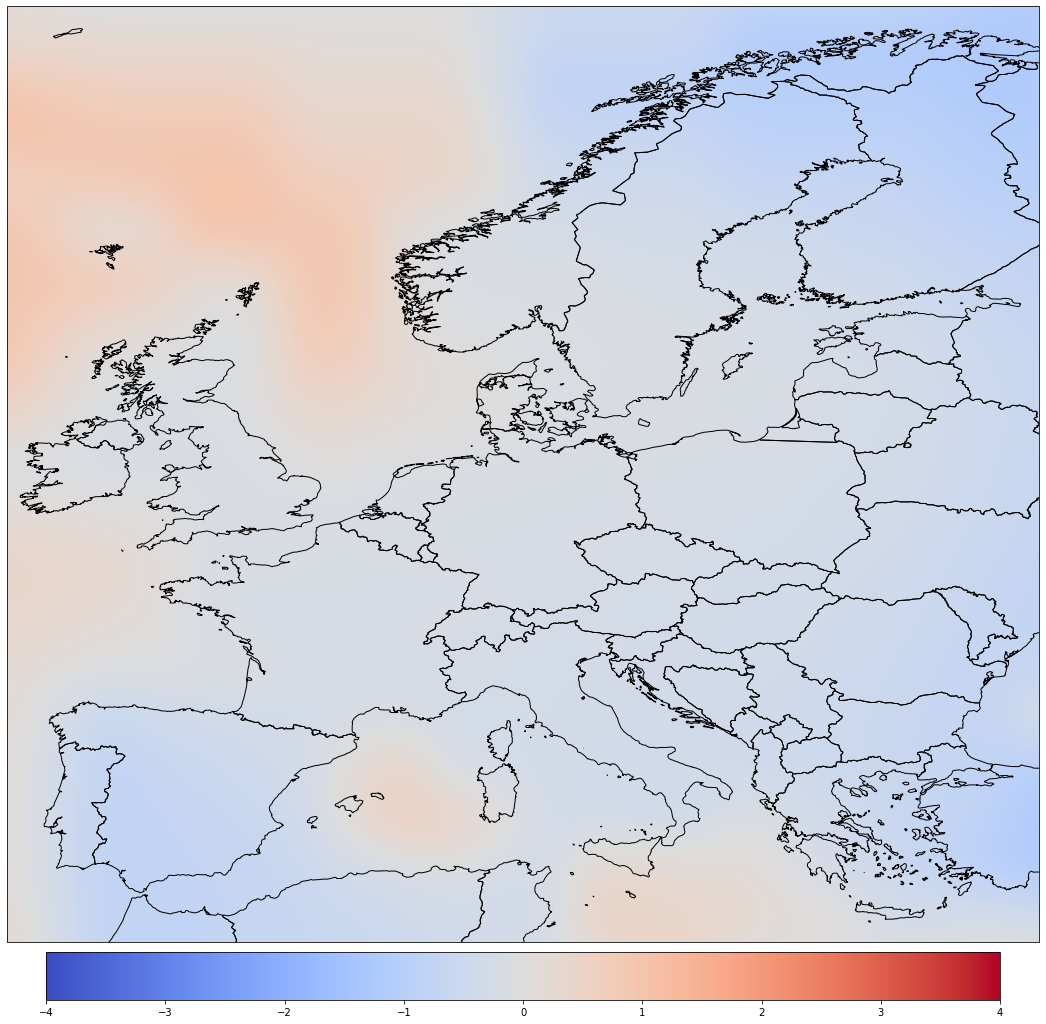

In [12]:
#Creating an animation for 1950-2020 and saving it as an MP4 video.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.96)
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

image = anomaly.isel(time=0).plot.imshow(ax=ax, add_labels=False,
                       vmin=-4, vmax=4, cmap='coolwarm', animated=True,
                       cbar_kwargs=cbar_kwargs, interpolation='bicubic')

def animate(t):
    date =  pd.to_datetime(anomaly.sel(time=t)['time'].values)
    ax.set_title("Temperature Anomaly in " + str(date.year) + " [°C]")
    ax.title.set_fontsize(18)
    image.set_array(anomaly.sel(time=t))
    return image


In [13]:
'''
https://towardsdatascience.com/visualising-the-worlds-carbon-dioxide-emissions-with-python-e9149492e820
'''

'\nhttps://towardsdatascience.com/visualising-the-worlds-carbon-dioxide-emissions-with-python-e9149492e820\n'

In [24]:
import pandas as pd

co2 = pd.read_csv("v6.0_CO2_excl_short-cycle_org_C_2018_TOTALS.txt", delimiter = ';')

print(co2)

          lat    lon  emission
0        89.9 -180.0  5.254660
1        89.9 -167.5  0.015244
2        89.9 -167.4  0.017199
3        89.9 -167.3  0.006027
4        89.9 -167.2  0.013846
...       ...    ...       ...
4180578 -85.2 -176.6  0.394360
4180579 -85.2 -176.5  0.746731
4180580 -85.2 -176.4  0.628619
4180581 -85.2 -176.3  0.102385
4180582 -85.2 -176.2  0.429210

[4180583 rows x 3 columns]


In [25]:
co2 = co2.sort_values('emission', ascending=False)
print(co2[:10])

          lat    lon     emission
1012811  41.0  122.5  374564000.0
1359553  31.2  121.3  349304000.0
1398044  30.1  115.0  216871000.0
1391037  30.3  114.1   87207300.0
1600552  24.2  120.4   68252000.0
581914   53.4   59.0   59483700.0
1064953  39.5  116.2   59403600.0
1009326  41.1  123.4   59272400.0
502675   55.9   37.7   54053400.0
1627151  23.4   86.3   52283200.0


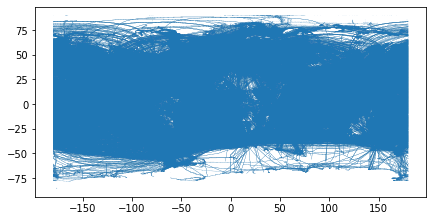

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(7, 3.5)
plt.scatter(co2['lon'], co2['lat'], s=0.05,  edgecolors='none')
plt.show()

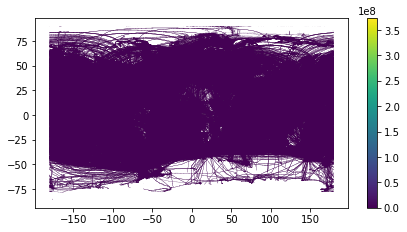

In [27]:
fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(co2['lon'], co2['lat'], c=co2['emission'], s=0.05,  edgecolors='none')
plt.colorbar(cols)
plt.show()

In [28]:
import numpy as np

print(co2.emission.value_counts())
print()
print("Min value: ", np.amin(co2.emission))
print("Max value: ", np.amax(co2.emission))

27.279800        1733
0.400113          910
0.299232          837
1.139410          801
54.667600         740
                 ... 
1.525810            1
2.591640            1
1382.030000         1
49.391200           1
366635.000000       1
Name: emission, Length: 2274163, dtype: int64

Min value:  2.39174e-08
Max value:  374564000.0


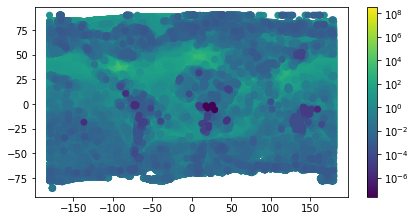

In [29]:
from matplotlib import colors

fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(co2['lon'], co2['lat'], c=co2['emission'], norm=colors.LogNorm())
plt.colorbar(cols)
plt.show()

In [36]:
fig = plt.figure()
fig.set_size_inches(7, 3.5)
plt.scatter(co2['lon'], co2['lat'], s=0.05, edgecolors='none', c=co2['emission'], norm=colors.LogNorm(), cmap='afmhot_r')
plt.show()

KeyboardInterrupt: 

In [ ]:
conda install geopandas

In [1]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(co2['lon'], co2['lat'])]
geodata = gpd.GeoDataFrame(co2, crs="EPSG:4326", geometry=geometry)

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')
fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap='afmhot', norm=colors.LogNorm(), s=0.05, edgecolors='none')
plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-8000000, 9000000)

logo = plt.imread('../../Branding/globe.png')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)

plt.show()

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

our_cmap = cm.get_cmap('afmhot', 11)
newcolors = our_cmap(np.linspace(0, 1, 11))
newcolors = newcolors[1:]

black = np.array([0.0, 0.0, 0.0, 1.0])
#newcolors[:1, :] = black
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 0.06, 6, 60, 600, 3000, 6000, 24000, 45000, 120000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

gradient = np.linspace(0, 1, 10)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=our_cmap)
plt.axis('off')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')

fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)

ax.set_ylim(-8000000, 9000000)
plt.show()

NameError: name 'geodata' is not defined

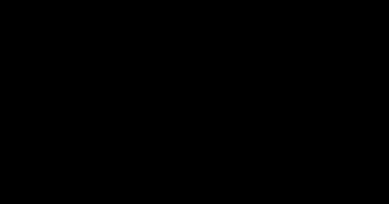

In [32]:
fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')

fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)

ax.set_ylim(-8000000, 9000000)

fig = ax.get_figure()
cax = fig.add_axes([0.36, 0.16, 0.33, 0.01])
sm = plt.cm.ScalarMappable(cmap=our_cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, cax=cax, orientation="horizontal", pad=0.2, format='%.1e',
                  ticks=[0.03, 3, 33, 330, 1800, 4500, 15000, 34500, 82500],
                  drawedges=True)
cb.outline.set_visible(False)
#cb.outline.set_linewidth(0.00001)
#cb.outline.set_color('white')
cb.ax.tick_params(labelsize=2, width=0.5, length=0.5, color='white')
cbytick_obj = plt.getp(cb.ax, 'xticklabels' ) #Set y tick label color
plt.setp(cbytick_obj, color='white')
cb.ax.set_xlabel('CO$_2$ Tons/Year', fontsize=4, color='white', labelpad=-16)
plt.show()